In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Data from the table
data = {
    'Propellant_age': [15.5, 23.75, 8, 17, 5.5, 19, 24, 2.5, 7.5, 11],
    'Storage_temp': [40, 23.25, 17, 21, 10, 12, 20, 12, 15, 26],
    'Label': ['fail', 'fail', 'pass', 'fail', 'pass', 'pass', 'fail', 'pass', 'pass', 'fail']
}

df = pd.DataFrame(data)

In [ ]:
df.head()

Propellant_age  Storage_temp Label
0           15.50         40.00  fail
1           23.75         23.25  fail
2            8.00         17.00  pass
3           17.00         21.00  fail
4            5.50         10.00  pass

In [ ]:
df

Propellant_age  Storage_temp Label
0           15.50         40.00  fail
1           23.75         23.25  fail
2            8.00         17.00  pass
3           17.00         21.00  fail
4            5.50         10.00  pass
5           19.00         12.00  pass
6           24.00         20.00  fail
7            2.50         12.00  pass
8            7.50         15.00  pass
9           11.00         26.00  fail

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Encoded_Label'] = label_encoder.fit_transform(df['Label'])  # pass → 1, fail → 0

In [ ]:
df.head()

Propellant_age  Storage_temp Label  Encoded_Label
0           15.50         40.00  fail              0
1           23.75         23.25  fail              0
2            8.00         17.00  pass              1
3           17.00         21.00  fail              0
4            5.50         10.00  pass              1

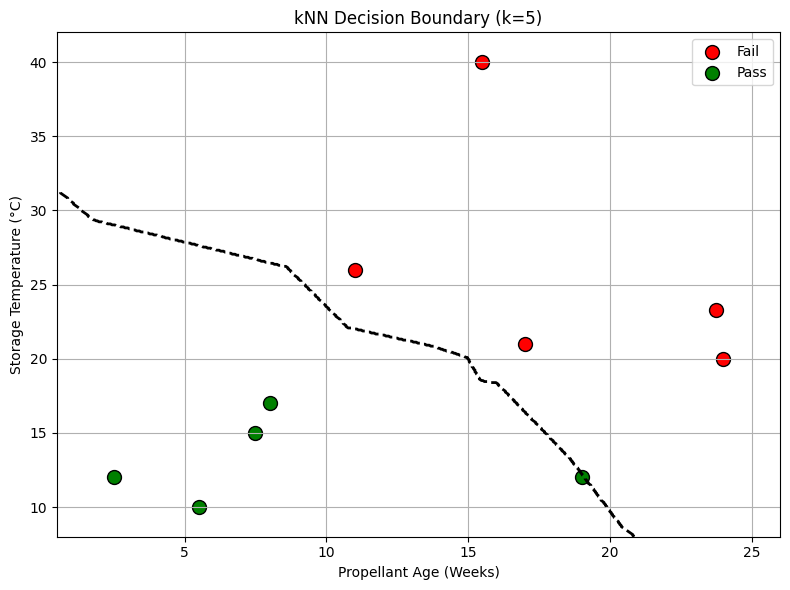

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Data (replace this with your own dataframe if needed)
X = df[['Propellant_age', 'Storage_temp']].values
y = df['Encoded_Label'].values  # 1 for pass, 0 for fail

# Train kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create a fine mesh grid (for boundary only)
x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary line only
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')

# Plot data points as colored circles
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', edgecolors='black', label='Fail', s=100, marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', edgecolors='black', label='Pass', s=100, marker='o')

plt.xlabel("Propellant Age (Weeks)")
plt.ylabel("Storage Temperature (°C)")
plt.title("kNN Decision Boundary (k=5)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Final_Decision_Boundary_(k=5).png")
plt.show()




In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Features and labels
X = df[['Propellant_age', 'Storage_temp']].values
y = df['Encoded_Label'].values

loo = LeaveOneOut()
k_values = list(range(1, len(X)))  # max k = n-1
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    preds = []
    for train_index, test_index in loo.split(X):
        # Skip if k > len(train set)
        if k > len(train_index):
            continue
        model.fit(X[train_index], y[train_index])
        y_pred = model.predict(X[test_index])
        preds.append(y_pred[0])
    acc = accuracy_score(y[:len(preds)], preds)
    accuracies.append(acc)


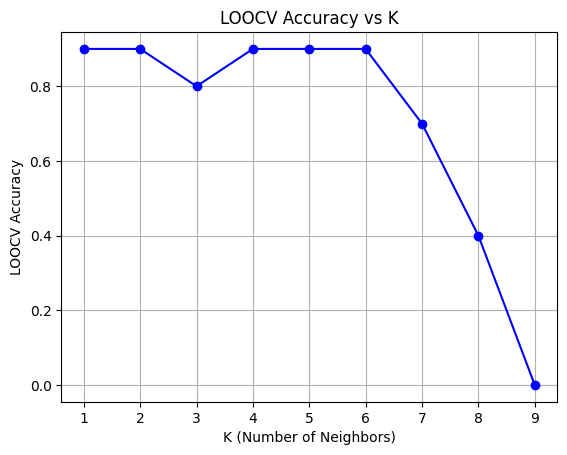

Best K from LOOCV: 1


In [ ]:
plt.plot(k_values[:len(accuracies)], accuracies, marker='o', color='blue')
plt.title("LOOCV Accuracy vs K")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("LOOCV Accuracy")
plt.grid(True)
plt.savefig("loocv_accuracy_vs_k.png")
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"Best K from LOOCV: {best_k}")



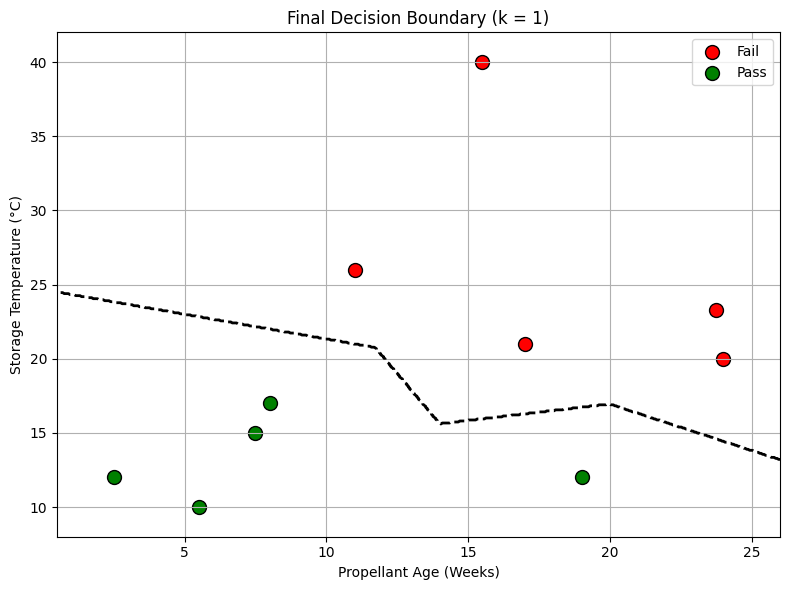

In [ ]:
# Final model with optimal k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X, y)

# Create meshgrid
x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over meshgrid
Z = final_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot boundary and data
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2, linestyles='--')

# Data points
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', edgecolors='black', label='Fail', s=100)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', edgecolors='black', label='Pass', s=100)

plt.xlabel("Propellant Age (Weeks)")
plt.ylabel("Storage Temperature (°C)")
plt.title(f"Final Decision Boundary (k = {best_k})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Final_Decision_Boundary_(k=1).png")
plt.show()



In [ ]:
best_k = k_values[np.argmax(accuracies)]

In [ ]:
best_accuracy = max(accuracies)
print(f"Best K from LOOCV: {best_k}")
print(f"LOOCV Accuracy for best K: {best_accuracy * 100:.2f}%")


Best K from LOOCV: 1
LOOCV Accuracy for best K: 90.00%
